# Cancer Mortality Rate Prediction

# Frame the problem

## Objective: 

The objective of this project is to predict cancer mortality rates using data from several counties in the United States. 
In this presentation I will show you how I designed my solution to predicting cancer mortality rates using a machine learning algorithm. 

## Type of Task: 

This task would fall into supervised learning because the model would be trained with labeled examples and each instance comes with an expected output. 

## How will model performance be measured?

My solution for predicting cancer mortality rates will be using the root mean squared error performance measure. I have selected this performance measure because it the performance measure I am most familiar with using, and for many it is the performance measure of choice for regression-based machine learning algorithms.

# Obtaining and Downloading Data

The dataset being used for this solution will be the OLS Regression challenge dataset collected and formed by the user Noah Rippner from https://data.world/. The exact dataset can be found from the following hyperlink. https://data.world/nrippner/ols-regression-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://query.data.world/s/muw4qlj3euwikk2x5ekfdey6cfokwj"
df = pd.read_csv(url, encoding='latin-1')

## Examine Data

Here we can see that there is numerical data, categorical, null data, and a lot of atttributes. 

In [3]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


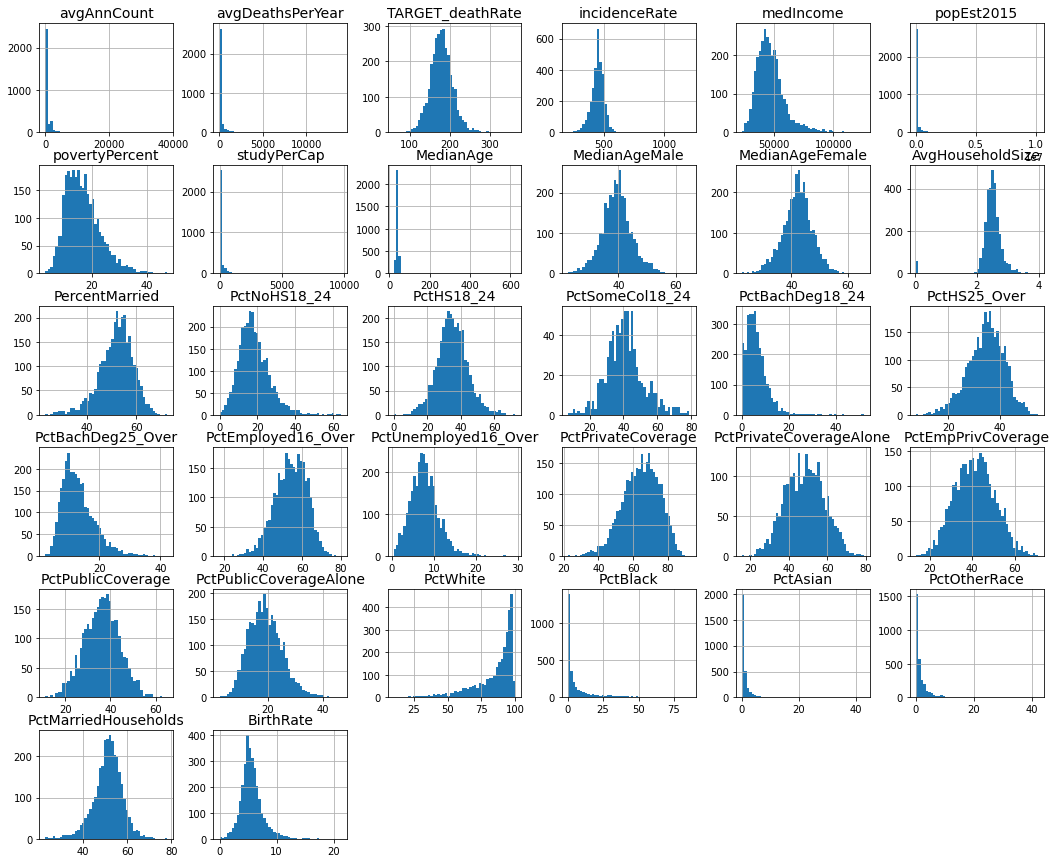

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(18, 15))
plt.show()

# Data Preparation

The first thing I want to do is to make a copy of the dataset.

In [7]:
cancer = df

Next, I create a correlation matrix to see the correlations of data attributes.

In [8]:
corr_matrix = cancer.corr()

Using the correlation matrix to see all the correlations to TARGET_deathRate

In [9]:
corr_matrix["TARGET_deathRate"].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctUnemployed16_Over       0.378412
PctHS18_24                 0.261976
PctBlack                   0.257024
PctNoHS18_24               0.088463
MedianAgeFemale            0.012048
MedianAge                  0.004375
MedianAgeMale             -0.021929
studyPerCap               -0.022285
AvgHouseholdSize          -0.036905
BirthRate                 -0.087407
avgDeathsPerYear          -0.090715
popEst2015                -0.120073
avgAnnCount               -0.143532
PctWhite                  -0.177400
PctAsian                  -0.186331
PctSomeCol18_24           -0.188688
PctOtherRace              -0.189894
PercentMarried            -0.266820
PctEmpPrivCoverage        -0.267399
PctBachDeg18_24           -0.287817
PctMarriedHouseholds      -0.293325
PctPrivateCoverageAlone   -0

These are attributes that have poor correlation to the target attribute so I decided to drop them. 

In [10]:
cancer = cancer.drop("binnedInc", axis=1)
cancer = cancer.drop("studyPerCap", axis=1)
cancer = cancer.drop("AvgHouseholdSize", axis=1)
cancer = cancer.drop("medIncome", axis=1)
cancer = cancer.drop("popEst2015", axis=1)
cancer = cancer.drop("PercentMarried", axis=1)
cancer = cancer.drop("PctMarriedHouseholds", axis=1)

The next thing I want to do is to split the data up into training and test sets.

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cancer, test_size=0.2, random_state=42)

Examining the values in TARGET_deathRate to better understand what the model is predicting. 

In [12]:
cancer["TARGET_deathRate"].head()

0    164.9
1    161.3
2    174.7
3    194.8
4    144.4
Name: TARGET_deathRate, dtype: float64

Here I am clustering some of the values of the target attribute to put them in groups. 

In [13]:
cancer["death_cat"] = pd.cut(df["TARGET_deathRate"],
                               bins=[0, 100, 125, 150, 175, 200, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

Here is a graph visualizing the clusters and what kind of values are more frequent in the attribute. 

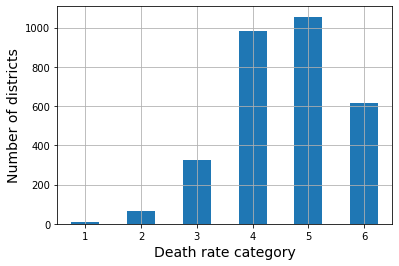

In [14]:
cancer["death_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Death rate category")
plt.ylabel("Number of districts")
plt.show()

Next, I decide to use the Stratified Shuffle Split package to shuffle and balance my training and testing data.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(cancer, cancer["death_cat"]):
    strat_train_set_n = cancer.iloc[train_index]
    strat_test_set_n = cancer.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [16]:
strat_train_set, strat_test_set = strat_splits[0]

In [17]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    cancer, test_size=0.2, stratify=cancer["death_cat"], random_state=42)

Here I am dropping the death_cat column that I used for grouping the TARGET_deathRate values together because I won't be using it anymore.

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("death_cat", axis=1, inplace=True)

Here I am dropping the TARGET_deathRate from the training set so my model can predict the values for it later. 

In [19]:
cancer = strat_train_set.drop("TARGET_deathRate", axis=1)
cancer_labels = strat_train_set["TARGET_deathRate"].copy()

## Cleaning floating numbers and integers with an imputer

To start cleaning and preparing my data for the machine learning model, I will use an imputer to calculate the mean values for numerical data to replace any null data.

In [20]:
from sklearn.impute import SimpleImputer

meanImputer = SimpleImputer(strategy="mean")


Here I am creating a dataframe that only includes numerical features that will work with the imputer.

In [21]:
cancer_num = cancer.select_dtypes(include=[np.number])

In [22]:
cancer_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 693 to 2178
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2437 non-null   float64
 1   avgDeathsPerYear         2437 non-null   int64  
 2   incidenceRate            2437 non-null   float64
 3   povertyPercent           2437 non-null   float64
 4   MedianAge                2437 non-null   float64
 5   MedianAgeMale            2437 non-null   float64
 6   MedianAgeFemale          2437 non-null   float64
 7   PctNoHS18_24             2437 non-null   float64
 8   PctHS18_24               2437 non-null   float64
 9   PctSomeCol18_24          624 non-null    float64
 10  PctBachDeg18_24          2437 non-null   float64
 11  PctHS25_Over             2437 non-null   float64
 12  PctBachDeg25_Over        2437 non-null   float64
 13  PctEmployed16_Over       2307 non-null   float64
 14  PctUnemployed16_Over  

Here I am fitting the imputer to the numerical dataframe.

In [23]:
meanImputer.fit(cancer_num)

SimpleImputer()

This is the outcome of the imputer, and we can check this by calculating the mean values of the dataframe. 

In [24]:
meanImputer.statistics_

array([617.70243434, 190.24948707, 448.36871391,  16.87718506,
        45.25597046,  39.62745178,  42.19191629,  18.20582684,
        34.99392696,  41.20608974,   6.12031186,  34.84649159,
        13.23286828,  54.09003034,   7.84874846,  64.33615101,
        48.32207859,  41.13840788,  36.35666803,  19.29663521,
        83.51864365,   9.06974101,   1.25093456,   1.99280374,
         5.62198164])

Checking the values stored in .statistics_ with what the actual values are

In [25]:
cancer_num.mean().values

array([617.70243434, 190.24948707, 448.36871391,  16.87718506,
        45.25597046,  39.62745178,  42.19191629,  18.20582684,
        34.99392696,  41.20608974,   6.12031186,  34.84649159,
        13.23286828,  54.09003034,   7.84874846,  64.33615101,
        48.32207859,  41.13840788,  36.35666803,  19.29663521,
        83.51864365,   9.06974101,   1.25093456,   1.99280374,
         5.62198164])

Next, I can check if the imputer successfully replaced null data by comparing it with the original dataframe that was not imputed. 

In [26]:
X = meanImputer.transform(cancer_num)

In [27]:
meanImputer.feature_names_in_

array(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'povertyPercent', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite',
       'PctBlack', 'PctAsian', 'PctOtherRace', 'BirthRate'], dtype=object)

In [28]:
cancer_tr = pd.DataFrame(X, columns=cancer_num.columns,
                          index=cancer_num.index)

So here is the original data...

In [29]:
null_rows_idx = cancer.isnull().any(axis=1)
cancer.loc[null_rows_idx].head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,PctNoHS18_24,PctHS18_24,...,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,BirthRate
693,84.000000,31,529.000000,10.1,36.6,35.5,37.8,"Saline County, Nebraska",20.0,18.0,...,76.3,60.9,54.0,25.7,11.6,91.622563,0.793872,2.681058,3.189415,3.062143
635,53.000000,24,485.100000,10.6,47.4,46.1,48.6,"Burt County, Nebraska",22.9,40.6,...,72.3,54.3,45.1,35.0,15.1,95.667218,0.977885,0.481420,0.646908,7.352941
926,33.000000,11,380.500000,4.6,32.3,31.6,32.8,"Morgan County, Utah",7.1,33.3,...,80.6,NaN,60.6,18.8,8.5,96.866485,0.360062,0.768782,1.050993,6.102877
2488,1962.667684,17,453.549422,10.2,46.5,45.1,48.4,"Lincoln County, Minnesota",17.9,31.6,...,78.6,58.2,45.0,33.7,12.2,97.210744,0.378788,0.154959,1.136364,5.539070
2272,108.000000,44,477.700000,11.5,42.2,40.6,43.9,"Clay County, Iowa",12.7,32.4,...,74.2,NaN,45.0,35.2,15.0,95.888009,0.713551,0.175364,1.209409,4.909253


... and here is the dataframe that was imputed.

In [30]:
cancer_tr.loc[null_rows_idx].head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,...,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,BirthRate
693,84.000000,31.0,529.000000,10.1,36.6,35.5,37.8,20.0,18.0,41.20609,...,76.3,60.900000,54.0,25.7,11.6,91.622563,0.793872,2.681058,3.189415,3.062143
635,53.000000,24.0,485.100000,10.6,47.4,46.1,48.6,22.9,40.6,41.20609,...,72.3,54.300000,45.1,35.0,15.1,95.667218,0.977885,0.481420,0.646908,7.352941
926,33.000000,11.0,380.500000,4.6,32.3,31.6,32.8,7.1,33.3,41.20609,...,80.6,48.322079,60.6,18.8,8.5,96.866485,0.360062,0.768782,1.050993,6.102877
2488,1962.667684,17.0,453.549422,10.2,46.5,45.1,48.4,17.9,31.6,41.20609,...,78.6,58.200000,45.0,33.7,12.2,97.210744,0.378788,0.154959,1.136364,5.539070
2272,108.000000,44.0,477.700000,11.5,42.2,40.6,43.9,12.7,32.4,41.20609,...,74.2,48.322079,45.0,35.2,15.0,95.888009,0.713551,0.175364,1.209409,4.909253


## Cleaning categorical data

So the next thing I need to do is to clean up data that is not numerical, and by looking at the current dataset, there is one attribute that has an object datatype. 

In [31]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 693 to 2178
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2437 non-null   float64
 1   avgDeathsPerYear         2437 non-null   int64  
 2   incidenceRate            2437 non-null   float64
 3   povertyPercent           2437 non-null   float64
 4   MedianAge                2437 non-null   float64
 5   MedianAgeMale            2437 non-null   float64
 6   MedianAgeFemale          2437 non-null   float64
 7   Geography                2437 non-null   object 
 8   PctNoHS18_24             2437 non-null   float64
 9   PctHS18_24               2437 non-null   float64
 10  PctSomeCol18_24          624 non-null    float64
 11  PctBachDeg18_24          2437 non-null   float64
 12  PctHS25_Over             2437 non-null   float64
 13  PctBachDeg25_Over        2437 non-null   float64
 14  PctEmployed16_Over    

This attribute is the geography data, so I will need to do some categorical cleaning so the model can work with the attribute's data. 

In [32]:
cancer_cat = cancer[["Geography"]]
cancer_cat.head(8)

,Geography
693,"Saline County, Nebraska"
635,"Burt County, Nebraska"
926,"Morgan County, Utah"
2449,"Spalding County, Georgia"
2488,"Lincoln County, Minnesota"
2272,"Clay County, Iowa"
2754,"Lancaster County, South Carolina"
887,"Queen Anne's County, Maryland"


Do to this, I am going to use the One Hot Encoder.

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
cancer_cat_1hot = cat_encoder.fit_transform(cancer_cat)

In [34]:
cat_encoder.categories_

[array(['Abbeville County, South Carolina', 'Acadia Parish, Louisiana',
        'Accomack County, Virginia', ..., 'Yuma County, Arizona',
        'Yuma County, Colorado', 'Zavala County, Texas'], dtype=object)]

## Feature Scaling

Another step in the preperation process I need to worry about is feature scaling. This is to balance the features and make sure they do not outweigh each other. 

In [35]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cancer_num_std_scaled = std_scaler.fit_transform(cancer_num)

## Pipeline

After deciding how I am going to clean and prepare all of the data for this model, I am going to group them together using a pipeline, that way I can perform imputing or encoding along with scaling. 

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("standardize", StandardScaler()),
])

In [37]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('standardize', StandardScaler())])

In [38]:
cancer_num_prepared = num_pipeline.fit_transform(cancer_num)
cancer_num_prepared[:2].round(2)

array([[-0.35, -0.3 ,  1.5 , -1.07, -0.19, -0.79, -0.83,  0.22, -1.89,
        -0.  ,  0.24, -0.02, -0.97,  1.14, -1.28,  1.13,  1.41,  1.38,
        -1.37, -1.26,  0.49, -0.57,  0.54,  0.33, -1.32],
       [-0.38, -0.31,  0.68, -0.99,  0.05,  1.24,  1.21,  0.58,  0.62,
        -0.  , -0.45,  0.62, -0.18,  0.41, -1.31,  0.75,  0.67,  0.42,
        -0.17, -0.69,  0.74, -0.56, -0.29, -0.37,  0.89]])

## Simple Imputer Bug Fix code

In [39]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


## Final Pipeline and Column Transformer

Here is my final set of pipelines that I will be using to prepare data for my model. 

In [41]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [42]:
def column_ratio(X):
    return X

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="mean"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

def num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="mean"),
        StandardScaler())

In [43]:
preprocessing = ColumnTransformer([
        ("avgAnnCount", num_pipeline(), ["avgAnnCount"]),
        ("avgDeathsPerYear", num_pipeline(), ["avgDeathsPerYear"]),
        ("incidenceRate", num_pipeline(), ["incidenceRate"]),
        ("povertyPercent", num_pipeline(), ["povertyPercent"]),
        ("Age", ratio_pipeline(), ["MedianAge", "MedianAgeMale", "MedianAgeFemale"]),
        ("Highschool education", ratio_pipeline(), ["PctNoHS18_24", "PctHS18_24", "PctHS25_Over"]),
        ("College Education", ratio_pipeline(), ["PctSomeCol18_24", "PctBachDeg18_24", "PctBachDeg25_Over"]),
        ("Employment", ratio_pipeline(), ["PctEmployed16_Over", "PctUnemployed16_Over"]),
        ("Insurance Coverage", ratio_pipeline(), ["PctPrivateCoverage", "PctPrivateCoverageAlone",
                                                  "PctEmpPrivCoverage", "PctPublicCoverage", "PctPublicCoverageAlone"]),
        ("Race", ratio_pipeline(), ["PctWhite", "PctBlack", "PctAsian", "PctOtherRace"]),
        ("BirthRate", num_pipeline(), ["BirthRate"]),
        ("Geography", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=num_pipeline())  # one column remaining: TARGET_deathRate

# Evaluating Training and testing Models

## Trying Ordinary Least Squares Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa76f6bd370>)])),
                ('linearregression', LinearRegression())])

Here we are predicting the TARGET_deathRate, and we can compare this to our validation data

In [45]:
cancer_predictions = lin_reg.predict(cancer)
cancer_predictions[:5]  #Predictions

array([181.89998694, 201.39998135, 138.70000787, 196.19997993,
       146.79999875])

In [46]:
cancer_labels.iloc[:5]  #Validation data

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

Next we want to use our performance measure we've selected

In [47]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lin_rmse

2.959361552430761e-05

Here I am using cross validation to see if I am overfitting the data. If the performance measure is lower than the cross validation score it means we are overfitting. 

In [48]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(lin_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     19.771517
std       0.966157
min      18.011019
25%      19.108318
50%      20.063389
75%      20.363609
max      21.159193
dtype: float64

## Trying Ridge Regression

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = make_pipeline(preprocessing, Ridge(alpha=.1, solver="cholesky", fit_intercept=False, random_state=42))
ridge_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa76f6bd370>)])),
                ('ridge',
                 Ridge(alpha=0.1, fit_intercept=False, random_state=42,
                       solver='cholesky'))])

In [57]:
cancer_predictions = ridge_reg.predict(cancer)
cancer_predictions[:5]

array([166.52524465, 183.28436423, 122.70925345, 181.05498515,
       131.53501077])

In [58]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [59]:
ridge_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
ridge_rmse

16.348489824417452

In [60]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(ridge_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count     10.000000
mean     179.868901
std        1.226181
min      177.893445
25%      179.061862
50%      180.035676
75%      180.425202
max      181.612598
dtype: float64

## Trying Lasso

In [62]:
from sklearn.linear_model import Lasso

lasso_reg = make_pipeline(preprocessing, Lasso(alpha=0.1))
lasso_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa76f6bd370>)])),
                ('lasso', Lasso(alpha=0.1))])

In [63]:
cancer_predictions = lasso_reg.predict(cancer)
cancer_predictions[:5]

array([190.71052293, 180.34893466, 141.58822341, 208.53701136,
       160.27471146])

In [64]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [65]:
lasso_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lasso_rmse

19.481985623645702

In [66]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(lasso_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     19.732899
std       0.962046
min      17.991693
25%      18.987448
50%      19.978070
75%      20.300223
max      21.156555
dtype: float64

## Trying Stochastic Gradient Descent

In [67]:
from sklearn.linear_model import SGDRegressor

sgd_reg = make_pipeline(preprocessing, SGDRegressor(random_state=42))
sgd_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa76f6bd370>)])),
                ('sgdregressor', SGDRegressor(random_state=42))])

In [68]:
cancer_predictions = sgd_reg.predict(cancer)
cancer_predictions[:5]

array([189.01328211, 185.38875631, 140.50112174, 205.76395799,
       154.3634434 ])

In [69]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [70]:
lin_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lin_rmse

14.568553380213352

In [71]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(sgd_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     21.297502
std       0.961368
min      19.552598
25%      20.820519
50%      21.428923
75%      22.005402
max      22.430452
dtype: float64

## Trying Elastic Net

In [72]:
from sklearn.linear_model import ElasticNet

ela_reg = make_pipeline(preprocessing, ElasticNet(random_state=42))
ela_reg.fit(cancer, cancer_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa76f6bd370>)])),
                ('elasticnet', ElasticNet(random_state=42))])

In [77]:
cancer_predictions = ela_reg.predict(cancer)
cancer_predictions[:5]

array([181.02945001, 178.06900633, 148.87047476, 202.48336239,
       167.004722  ])

In [78]:
cancer_labels.iloc[:5]

693     181.9
635     201.4
926     138.7
2449    196.2
2488    146.8
Name: TARGET_deathRate, dtype: float64

In [79]:
ela_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
ela_rmse

20.237811344514615

In [80]:
from sklearn.model_selection import cross_val_score

cross_score = -cross_val_score(ela_reg, cancer, cancer_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cross_score).describe()

count    10.000000
mean     20.333152
std       0.991903
min      18.433179
25%      19.794009
50%      20.474864
75%      21.198182
max      21.413435
dtype: float64

# Decision to use the Elastic Net Regression

## Fine Tuning using gridsearch

The first thing I need to do is to fine tune the Elastic Net model now since I have decided that is the model I am going to use. 

So to do this, I decide to use the Grid Search package which will find the best set of hyperparameter settins using my RMSE performance measure to rank the different parameter configurations. 

In [81]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("Elastic", ElasticNet(random_state=42)),
])

param_grid = [
{
    'Elastic__alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'Elastic__l1_ratio': [0.1, 0.5, 0.9],
    'Elastic__fit_intercept': [True, False],
    'Elastic__normalize': [True, False],
}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
#grid_search.estimator.get_params().keys()
grid_search.fit(cancer, cancer_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer()),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('avgAnnCount',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['avgAnnCount']),
                                                                        ('avgDeathsPerYear',
                                                                         Pipeline(steps=[('s...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa76f6bd370>)])),
                                       ('Elastic',
                                        ElasticNet(random_state=42))]),
             param_grid=[{'Elastic__alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5,
                                             0.7, 1],
                          'Elastic__fit_intercept': [True, False],
                          'Elastic__l1_ratio': [0.1, 0.5, 0.9],
                          'Elastic__normalize': [True, False]}],
             scoring='neg_root_mean_squared_error')

In [82]:
grid_search.best_params_

{'Elastic__alpha': 0.1,
 'Elastic__fit_intercept': True,
 'Elastic__l1_ratio': 0.5,
 'Elastic__normalize': False}

In [83]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Elastic__alpha,param_Elastic__fit_intercept,param_Elastic__l1_ratio,param_Elastic__normalize,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
39,0.272668,0.017595,0.046365,0.002000,0.1,True,0.5,False,"{'Elastic__alpha': 0.1, 'Elastic__fit_intercep...",-20.414923,-19.826659,-19.313131,-19.851571,0.450149,1
41,0.354731,0.021678,0.059156,0.016547,0.1,True,0.9,False,"{'Elastic__alpha': 0.1, 'Elastic__fit_intercep...",-20.435788,-19.801710,-19.324562,-19.854020,0.455162,2
37,0.400349,0.019251,0.046592,0.001885,0.1,True,0.1,False,"{'Elastic__alpha': 0.1, 'Elastic__fit_intercep...",-20.411193,-19.854170,-19.313155,-19.859506,0.448288,3
5,8.559488,0.357152,0.049689,0.003670,0.0001,True,0.9,False,"{'Elastic__alpha': 0.0001, 'Elastic__fit_inter...",-20.391663,-19.828490,-19.382991,-19.867715,0.412722,4
29,1.385375,0.375667,0.055188,0.013196,0.01,True,0.9,False,"{'Elastic__alpha': 0.01, 'Elastic__fit_interce...",-20.408952,-19.841002,-19.370928,-19.873627,0.424399,5


# Evaluation

## Evaluating the tuned model on the validation set

Here I am creating a pipeline with the preprocessing pipeline and the Elastic Net Model with the best parameter configurations from the Grid Search. 

In [84]:
final_model = Pipeline([
    ("preprocessing", preprocessing),
    ("Elastic", ElasticNet(alpha=0.1, fit_intercept=True, l1_ratio=0.5, normalize=False, random_state=42)),
])

final_model.fit(cancer, cancer_labels)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('avgAnnCount',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['avgAnnCount']),
                                                 ('avgDeathsPerYear',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BirthRate']),
                                                 ('Geography',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa76f6bd370>)])),
                ('Elastic',
                 ElasticNet(alpha=0.1, normalize=False, random_state=42))])

Here I am saving the results from the prediction using the final model and the validation data, then using its results to calculate a performance measure score.

In [85]:
cancer_predictions = final_model.predict(cancer)

In [86]:
lin_rmse = mean_squared_error(cancer_labels, cancer_predictions,
                              squared=False)
lin_rmse

19.51453939828682

Here I am using the test set that I created near the begining of this project, and I and using it to fit the model and predict TARGET_deathRate values. Lastly I take a look at the final performance measure scores.

In [87]:
x_test = strat_test_set.drop("TARGET_deathRate", axis=1)
y_test = strat_test_set["TARGET_deathRate"].copy()

final_predictions = final_model.predict(x_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

19.36552444029631


Lastly, these are some of the predicted values of the test set compared to the actual values.

In [88]:
final_predictions[:5]

array([178.37463274, 161.58515358, 158.42016984, 163.44348789,
       161.96271999])

In [89]:
y_test.iloc[:5]

67      172.2
157     155.6
1694    144.6
2520    153.7
2454    151.9
Name: TARGET_deathRate, dtype: float64

# Conclusion